In [21]:
# Step 1: Import Libraries
import pandas as pd

# Step 2: Load Dataset
df = pd.read_csv("C:/Users/gupta/Downloads/customer_data.csv")

# Step 3: Clean Column Names (Recommended)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
print("Cleaned Columns:", df.columns.tolist())

# Step 4: Inspect the Dataset

# Dataset shape (rows, columns)
print("Shape of dataset:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Data types of each column
print("\nData types:\n", df.dtypes)

# Summary statistics for numeric columns
print("\nSummary statistics:\n", df.describe())


Cleaned Columns: ['CustomerID', 'Age', 'Annual_Income_k$', 'Spending_Score']
Shape of dataset: (200, 4)

Missing values:
 CustomerID          0
Age                 0
Annual_Income_k$    0
Spending_Score      0
dtype: int64

Duplicate rows: 0

Data types:
 CustomerID          int64
Age                 int64
Annual_Income_k$    int64
Spending_Score      int64
dtype: object

Summary statistics:
        CustomerID         Age  Annual_Income_k$  Spending_Score
count  200.000000  200.000000        200.000000      200.000000
mean   100.500000   38.850000         60.560000       50.200000
std     57.879185   13.969007         26.264721       25.823522
min      1.000000   18.000000         15.000000        1.000000
25%     50.750000   28.750000         41.500000       34.750000
50%    100.500000   36.000000         61.500000       50.000000
75%    150.250000   49.000000         78.000000       73.000000
max    200.000000   70.000000        137.000000       99.000000


In [25]:
# Step 1: Import Scaler
from sklearn.preprocessing import StandardScaler

# Step 2: Select Relevant Features
# Assuming you already cleaned the column names in Task 1
features = ['Age', 'Annual_Income_k$', 'Spending_Score']
X = df[features]

# Step 3: Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Store Scaled Data (Optional)
scaled_df = pd.DataFrame(X_scaled, columns=features)
print("\nFirst 5 rows of scaled features:\n", scaled_df.head())



First 5 rows of scaled features:
         Age  Annual_Income_k$  Spending_Score
0 -1.424569         -1.738999       -0.434801
1 -1.281035         -1.738999        1.195704
2 -1.352802         -1.700830       -1.715913
3 -1.137502         -1.700830        1.040418
4 -0.563369         -1.662660       -0.395980


C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

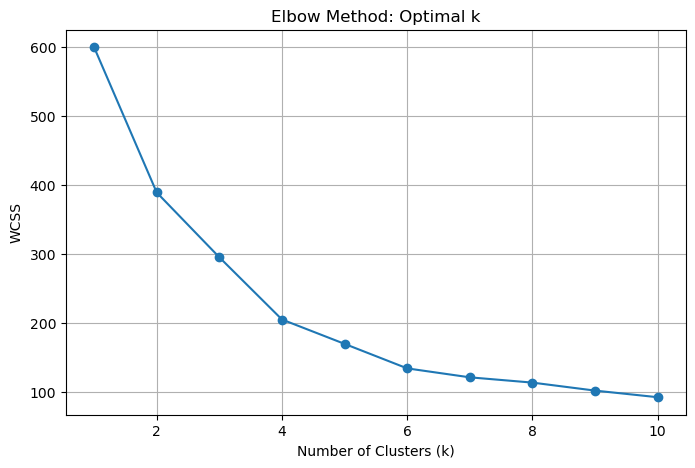


Silhouette Scores:
  k=2: Silhouette Score = 0.3355
  k=3: Silhouette Score = 0.3579
  k=4: Silhouette Score = 0.4040
  k=5: Silhouette Score = 0.4085
  k=6: Silhouette Score = 0.4311
  k=7: Silhouette Score = 0.4101
  k=8: Silhouette Score = 0.3674
  k=9: Silhouette Score = 0.3744
  k=10: Silhouette Score = 0.3619

Cluster counts:
Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64

Sample data with cluster labels:
   Age  Annual_Income_k$  Spending_Score  Cluster
0   19                15              39        2
1   21                15              81        2
2   20                16               6        3
3   23                16              77        2
4   31                17              40        2


C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [29]:
# Step 1: Import Required Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 2: Elbow Method to Determine Optimal Clusters
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Step 3: Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.title("Elbow Method: Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Step 4: Silhouette Scores for Validation
print("\nSilhouette Scores:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"  k={k}: Silhouette Score = {score:.4f}")

# Step 5: Apply KMeans with Optimal k 
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: View Cluster Counts and Sample Data
print("\nCluster counts:")
print(df['Cluster'].value_counts())

print("\nSample data with cluster labels:")
print(df[['Age', 'Annual_Income_k$', 'Spending_Score', 'Cluster']].head())


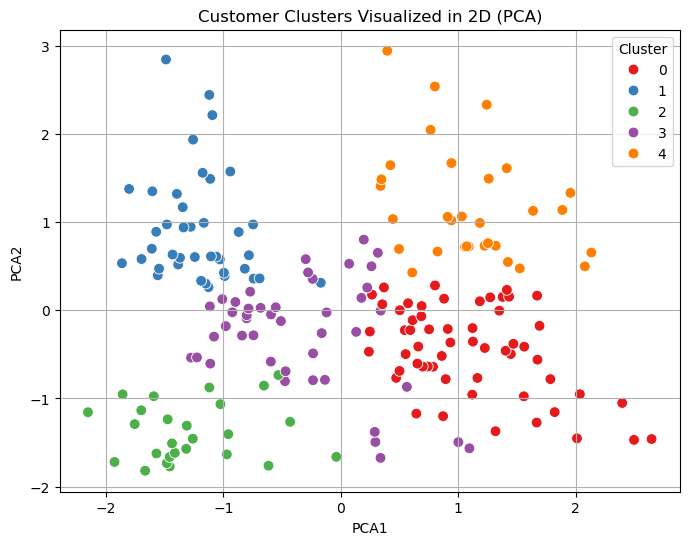

In [31]:
# Step 1: Import PCA
from sklearn.decomposition import PCA

# Step 2: Reduce Features to 2D for Visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Add PCA results to the DataFrame
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

# Step 3: 2D Scatter Plot (PCA Reduced)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=60)
plt.title("Customer Clusters Visualized in 2D (PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()


In [33]:
# Save final DataFrame with cluster labels and PCA coordinates
df.to_csv("clustered_customers.csv", index=False)
print(" Clustered dataset saved as 'clustered_customers.csv'")


 Clustered dataset saved as 'clustered_customers.csv'


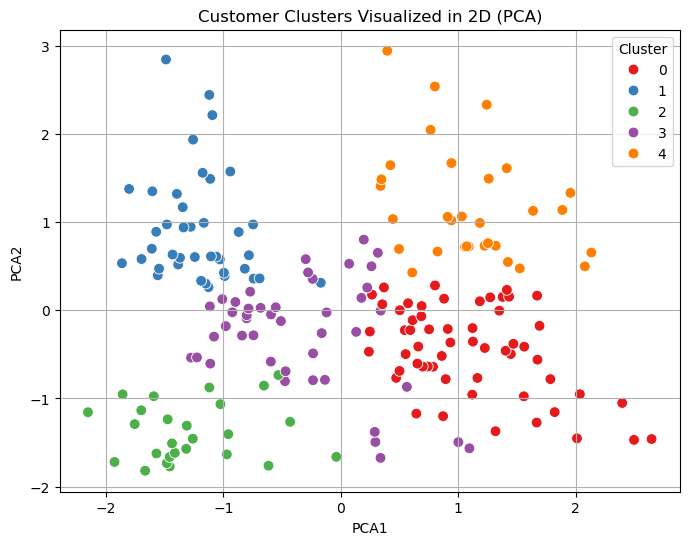

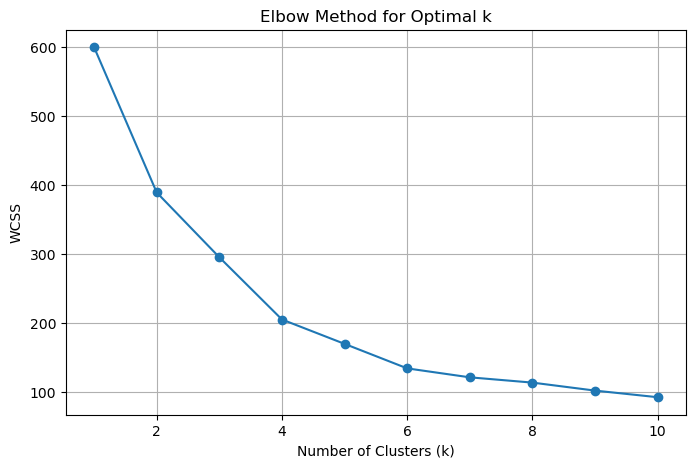

In [35]:
# Save PCA scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=60)
plt.title("Customer Clusters Visualized in 2D (PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.savefig("pca_clusters.png")
plt.show()

# Save Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.savefig("elbow_method.png")
plt.show()


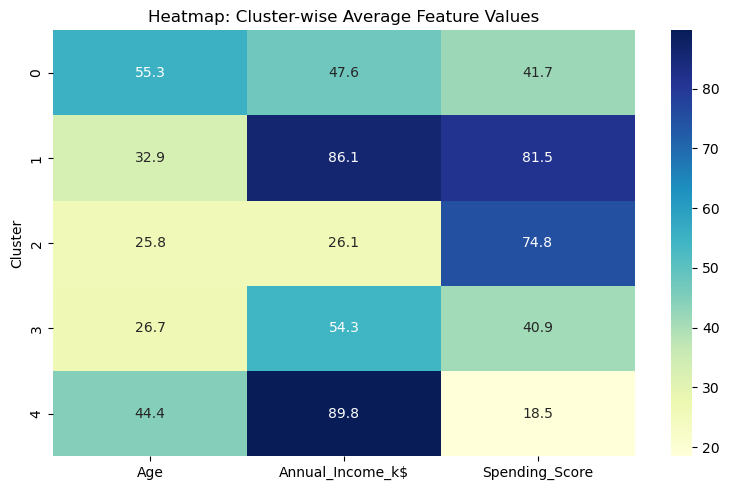

In [39]:
# Create a heatmap of average features per cluster
cluster_means = df.groupby('Cluster')[['Age', 'Annual_Income_k$', 'Spending_Score']].mean()

plt.figure(figsize=(8, 5))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Heatmap: Cluster-wise Average Feature Values")
plt.tight_layout()
plt.savefig("cluster_heatmap.png")
plt.show()


In [43]:
# Group-wise cluster summary
cluster_summary = df.groupby('Cluster')[['Age', 'Annual_Income_k$', 'Spending_Score']].mean()
print("\n Cluster Summary (Mean Values):")
print(cluster_summary)

# Basic marketing recommendations based on rules
print("\n --- Marketing Recommendations ---")
for idx, row in cluster_summary.iterrows():
    print(f"\nCluster {idx}:")
    if row['Annual_Income_k$'] > df['Annual_Income_k$'].mean() and row['Spending_Score'] > df['Spending_Score'].mean():
        print("   High-income, high-spenders → Promote luxury/premium products.")
    elif row['Annual_Income_k$'] > df['Annual_Income_k$'].mean() and row['Spending_Score'] < df['Spending_Score'].mean():
        print("   High-income, low-spenders → Use personalized offers to increase engagement.")
    elif row['Annual_Income_k$'] < df['Annual_Income_k$'].mean() and row['Spending_Score'] > df['Spending_Score'].mean():
        print("   Low-income, high-spenders → Offer discounts or loyalty programs.")
    else:
        print("   Low-income, low-spenders → Consider retention or educational campaigns.")



 Cluster Summary (Mean Values):
               Age  Annual_Income_k$  Spending_Score
Cluster                                             
0        55.275862         47.620690       41.706897
1        32.875000         86.100000       81.525000
2        25.769231         26.115385       74.846154
3        26.733333         54.311111       40.911111
4        44.387097         89.774194       18.483871

 --- Marketing Recommendations ---

Cluster 0:
   Low-income, low-spenders → Consider retention or educational campaigns.

Cluster 1:
   High-income, high-spenders → Promote luxury/premium products.

Cluster 2:
   Low-income, high-spenders → Offer discounts or loyalty programs.

Cluster 3:
   Low-income, low-spenders → Consider retention or educational campaigns.

Cluster 4:
   High-income, low-spenders → Use personalized offers to increase engagement.
